## Elipsoide_Teste_FAT_ModelVision_Comparacao - Diego Taka

## Coisas para importar

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from fatiando import mesher, gridder, utils
from fatiando.vis import mpl
%matplotlib inline

## Importar minhas funções de um arquivo externo

In [19]:
import Elipsoide_Clark_FAT_Unificado as me

## Input

In [20]:
x,y,dist_abs,elev,campo_mag,bxM,byM,bzM = np.loadtxt('saida_elipsoide_Vanderlei.txt', unpack=True)

#### Fatiando a Terra - Ellipsoid

In [ ]:
# Malha coordenadas geograficas
xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)


# Create a regular grid at 0m height
Nx = 63
Ny = 63
shape = (Nx, Ny)
area = [xmin, xmax, ymin, ymax]

#xc posicao x , yc posição y e zc profundidade reais
xc = 0.
yc = 0.
zc = 300.

# Orientacoes do elipsoide
azimuth = 180.
delta = 45.
gamma = 45.

# Eixos do elipsoide
a = 250.
b = 150.
c = 100.

# Set the inclination and declination of the regional field
inten, inc, dec  = 60000, -65., 10.

################################################################################################################################

# Create a ellipsoid model
model = [me.Ellipsoid(y, x, elev, xc, yc, zc, a, b, c, azimuth, delta, gamma,
                       {'remanence': np.array([10, 90., 10.]),
                        'k1': np.array([0.12, 0., 90.]),
                        'k2': np.array([0.10, 0., 180.]),
                        'k3': np.array([0.08, 90., 0.])}
                       )]

In [21]:
# Calculate the anomaly for a given regional field
JRD_cart = me.jrd_cartesiano (inten,inc,dec,model)
Bx = me.bx_c (x,y,elev,inten,inc,dec,model)
By = me.by_c (x,y,elev,inten,inc,dec,model)
Bz = me.bz_c (x,y,elev,inten,inc,dec,model)
Tf = me.tf_c (x,y,elev,inten,inc,dec,model)

In [26]:
JRD_cart

[[3527.8261655253605, -65.596164321920511, 1.6619761763588232]]

## Resultado da minha função

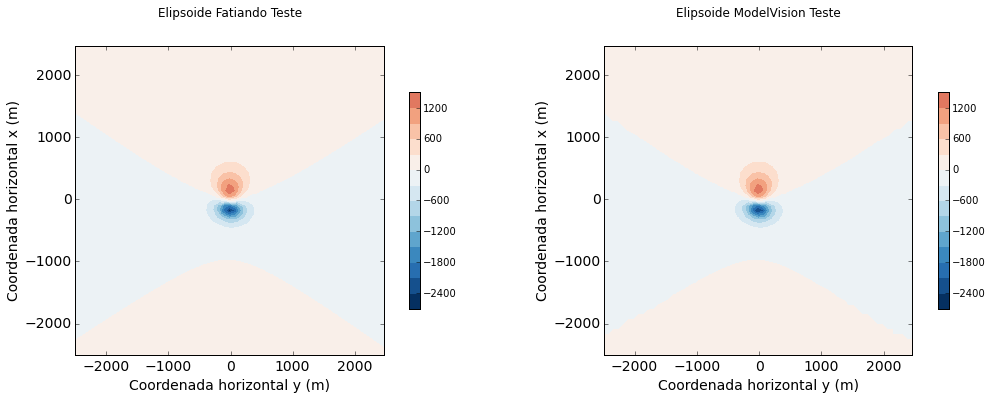

In [22]:
ranges_bx = np.max(np.abs([np.max(Bx), np.min(Bx),
                           np.max(bxM), np.min(bxM)]))

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Elipsoide Fatiando Teste', y=1.08)
plt.axis('scaled')
plt.tricontourf(x,y,Bx,15,
            vmin = -ranges_bx, vmax = ranges_bx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(2,2,2)
plt.title('Elipsoide ModelVision Teste', y=1.08)
plt.axis('scaled')
plt.tricontourf(x,y,byM,15,
            vmin = -ranges_bx, vmax = ranges_bx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

plt.show()

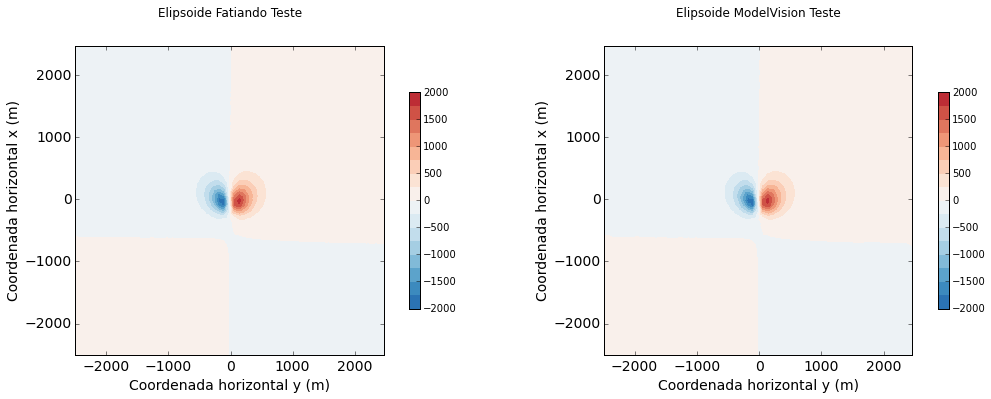

In [23]:
ranges_by = np.max(np.abs([np.max(By), np.min(By),
                           np.max(byM), np.min(byM)]))

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Elipsoide Fatiando Teste', y=1.08)
plt.axis('scaled')
plt.tricontourf(x,y,By,15,
            vmin = -ranges_by, vmax = ranges_by,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(2,2,2)
plt.title('Elipsoide ModelVision Teste', y=1.08)
plt.axis('scaled')
plt.tricontourf(x,y,bxM,15,
            vmin = -ranges_by, vmax = ranges_by,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

plt.show()

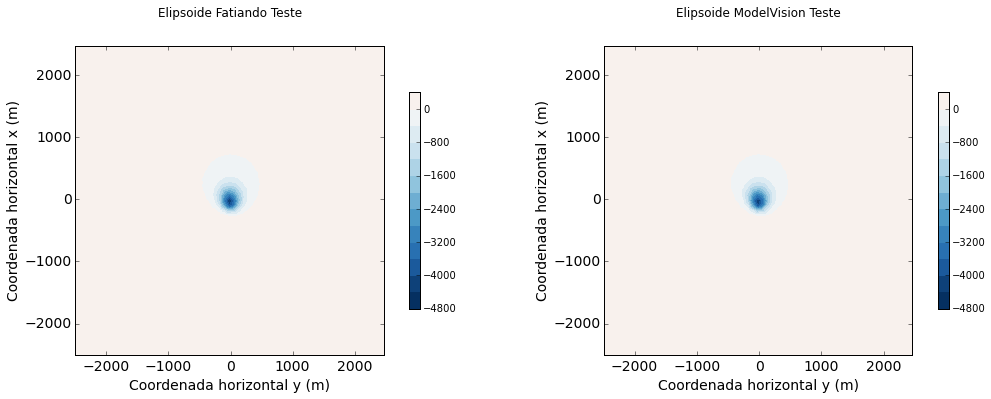

In [25]:
ranges_bz = np.max(np.abs([np.max(Bz), np.min(Bz),
                           np.max(bzM), np.min(bzM)]))

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Elipsoide Fatiando Teste', y=1.08)
plt.axis('scaled')
plt.tricontourf(x,y,Bz,15,
            vmin = -ranges_bz, vmax = ranges_bz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(2,2,2)
plt.title('Elipsoide ModelVision Teste', y=1.08)
plt.axis('scaled')
plt.tricontourf(x,y,bzM,15,
            vmin = -ranges_bz, vmax = ranges_bz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

plt.show()